# Εργαστήριο 2 - Απαντήσεις

In [ ]:
import qiskit as qlib

## Άσκηση 2.1

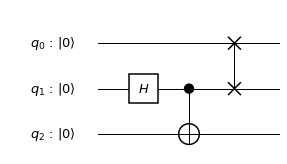

In [11]:
qr = qlib.QuantumRegister(3, 'q')
circ = qlib.QuantumCircuit(qr)
circ.h(qr[1])
circ.cx(qr[1],qr[2])
circ.swap(qr[0],qr[1])
circ.draw(output='mpl')

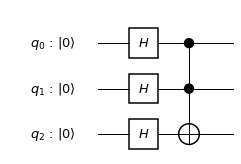

In [3]:
qr = qlib.QuantumRegister(3, 'q')
circ = qlib.QuantumCircuit(qr)
circ.h(qr)
circ.ccx(qr[0],qr[1],qr[2])
circ.draw(output='mpl')

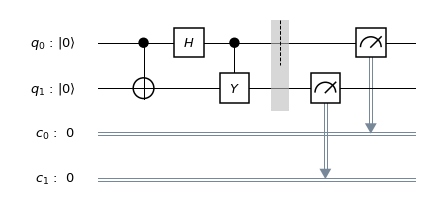

In [4]:
qr = qlib.QuantumRegister(2, 'q')
cr = qlib.ClassicalRegister(2, 'c')
circ = qlib.QuantumCircuit(qr, cr)
circ.cx(qr[0],qr[1])
circ.h(qr[0])
circ.cy(qr[0],qr[1])
circ.barrier()
circ.measure(qr,cr)
circ.draw(output='mpl')

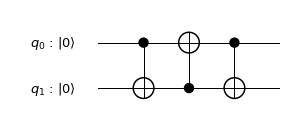

In [5]:
qr = qlib.QuantumRegister(2, 'q')
circ = qlib.QuantumCircuit(qr)
circ.cx(qr[0],qr[1])
circ.cx(qr[1],qr[0])
circ.cx(qr[0],qr[1])
circ.draw(output='mpl')

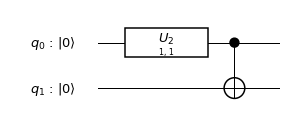

In [6]:
qr = qlib.QuantumRegister(2, 'q')
circ = qlib.QuantumCircuit(qr)
circ.u2(1, 1, qr[0])
circ.cx(qr[0],qr[1])
circ.draw(output='mpl')

## Άσκηση 2.2

$$ u_3 u_3^\dagger = I $$

$$\begin{align*}
X &= \begin{pmatrix}0 & 1\\1 & 0\end{pmatrix} =& u3(\pi, 0, \pi) \\
Y &= \begin{pmatrix}0 & -i\\i & 0\end{pmatrix} =& u3(\pi, \pi/2, \pi/2) \\
Z &= \begin{pmatrix}1 & 0\\0 & -1\end{pmatrix} =& u1(\pi) = u3(0,0,\pi) \\
H &= \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\\1 & -1\end{pmatrix} =& u2(0,\pi) = u3(\pi/2, 0, \pi) \\
S &= \begin{pmatrix}1 & 0\\0 & i\end{pmatrix} =& u1(\pi/2) = u3(0, 0, \pi/2) \\
T &= \begin{pmatrix}1 & 0\\0 & (i + 1)/\sqrt{2}\end{pmatrix} =& u1(\pi/4) = u3(0, 0, \pi/4)
\end{align*}$$



## Άσκηση 2.3

[0.-0.70710678j 0.+0.70710678j]


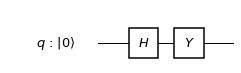

In [12]:
backend = qlib.Aer.get_backend("statevector_simulator")

qr = qlib.QuantumRegister(1,'q')
circ = qlib.QuantumCircuit(qr)
circ.h(qr[0])
circ.y(qr[0])
state = (qlib.execute(circ, backend).result()).get_statevector(circ)
print(state)
circ.draw(output='mpl')

[ 0.+0.j -1.+0.j]


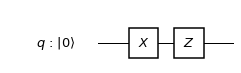

In [8]:
circ = qlib.QuantumCircuit(qr)
circ.x(qr[0])
circ.z(qr[0])
state = (qlib.execute(circ, backend).result()).get_statevector(circ)
print(state)
circ.draw(output='mpl')

[0.+0.j 0.+1.j]


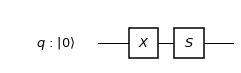

In [9]:
circ = qlib.QuantumCircuit(qr)
circ.x(qr[0])
circ.s(qr[0])
state = (qlib.execute(circ, backend).result()).get_statevector(circ)
print(state)
circ.draw(output='mpl')

[0.        +0.j         0.70710678+0.70710678j]


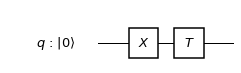

In [10]:
circ = qlib.QuantumCircuit(qr)
circ.x(qr[0])
circ.t(qr[0])
state = (qlib.execute(circ, backend).result()).get_statevector(circ)
print(state)
circ.draw(output='mpl')

## Άσκηση 2.4


```python
qr = qlib.QuantumRegister(2, 'q')
circ = qlib.QuantumCircuit(qr)
circ.h(qr)
circ.swap(qr[0],qr[1])
```
![a](img/lab2/lab2.4a.png)![a-a](img/lab2/lab2.4a-a.png)

```python
qr = qlib.QuantumRegister(1, 'q')
circ = qlib.QuantumCircuit(qr)
circ.h(qr[0])
circ.s(qr[0])
```
![b](img/lab2/lab2.4b.png)![b-b](img/lab2/lab2.4b-b.png)

```python
qr = qlib.QuantumRegister(2, 'q')
circ = qlib.QuantumCircuit(qr)
circ.u3(1,1,1,qr[0])
circ.h(qr[1])
circ.z(qr[0])
```
![c](img/lab2/lab2.4c.png)![c-c](img/lab2/lab2.4c-c.png)



## Άσκηση 2.5

```python
qbits = qlib.QuantumRegister(2,'q')
cbits = qlib.ClassicalRegister(2,'c')
program = qlib.QuantumCircuit(qbits, cbits)
program.cx(qbits[0],qbits[1])
program.h(qbits[0])
program.barrier()
program.measure(qbits,cbits)

qlib.IBMQ.load_accounts()
backend = qlib.IBMQ.get_backend('ibmq_qasm_simulator')
result = qlib.execute(program, backend).result()
counts = result.get_counts(program)

print(counts)

# {'00': 523, '01': 501}

```

## Άσκηση 2.6

Ξεκινώντας από την γενική κατάσταση $$\left|\psi00\right>,$$ καταλήγουμε στην

$$\frac{1}{2}\left( \left|00\right> + \left|01\right> + \left|10\right> - \left|11\right> \right) \,\otimes\, \left|\psi\right>$$

Το κύκλωμα, δηλαδή, αντιγράφει την κατάσταση του πρώτου qubit στο τρίτο qubit. Όπως θα δούμε αργότερα, αυτός είναι ο αλγόριθμος της τηλεμεταφοράς.